<a href="https://colab.research.google.com/github/freya9711/Freya-Dissertation/blob/main/CatnwellF_170691367_Facebook_Prophet_Model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facebook Prophet**

Importing the libraries 

In [ ]:
import pandas as pd
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn import preprocessing
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from fbprophet.plot import plot_plotly, plot_components_plotly

Installing yahoo finance

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

Importing the data 

In [ ]:
#Downloading historical stock prices from yahoo finance
data =yf.download("^OEX", start = '2017-01-01', interval='1wk', end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,997.030029,1010.260010,994.789978,1008.150024,1008.150024,14637130000
2017-01-08,1006.669983,1009.429993,998.299988,1006.590027,1006.590027,17020210000
2017-01-15,1003.539978,1005.640015,997.900024,1003.039978,1003.039978,13591180000
2017-01-22,1001.309998,1014.289978,997.090027,1012.929993,1012.929993,17555940000
2017-01-29,1009.150024,1014.049988,999.950012,1013.690002,1013.690002,19001010000


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-01,1400.209961,1404.099976,1366.550049,1402.310059,1402.310059,17452390000
2019-12-08,1400.300049,1419.280029,1392.880005,1413.619995,1413.619995,17669880000
2019-12-15,1419.979980,1440.339966,1419.979980,1435.650024,1435.650024,22078130000
2019-12-22,1437.670044,1451.719971,1436.209961,1447.469971,1447.469971,8946500000
2019-12-29,1447.630005,1448.119995,1436.239990,1438.140015,1438.140015,3013290000


Cleaing the data 

In [ ]:
data.reset_index(inplace=True)

Selecting the important features and renaming the columns

In [ ]:
# select Date and Price
fbdata = data[["Date","Adj Close"]] 
fbdata = fbdata.rename(columns = {"Date":"ds","Adj Close":"y"}) 

In [ ]:
fbdata.head(5)

,ds,y
0,2017-01-01,1008.150024
1,2017-01-08,1006.590027
2,2017-01-15,1003.039978
3,2017-01-22,1012.929993
4,2017-01-29,1013.690002


Plotting the data 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fbdata['ds'], y=fbdata['y'], name='Price',))
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="S&P adjusted close stock price")
fig.update_layout(title_text="S&P stock prices")
fig.show()

Apply Box-Cox Transform and save the lambda for later inverse.

In [ ]:
fbdata['y'], lam = boxcox(fbdata['y'])
print('Lambda is:', lam)

Lambda is: 0.38907760259347757


**Creating the Model**

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = True) # the Prophet class (model)
m.fit(fbdata) # fit the model using all data

Creating the prediction

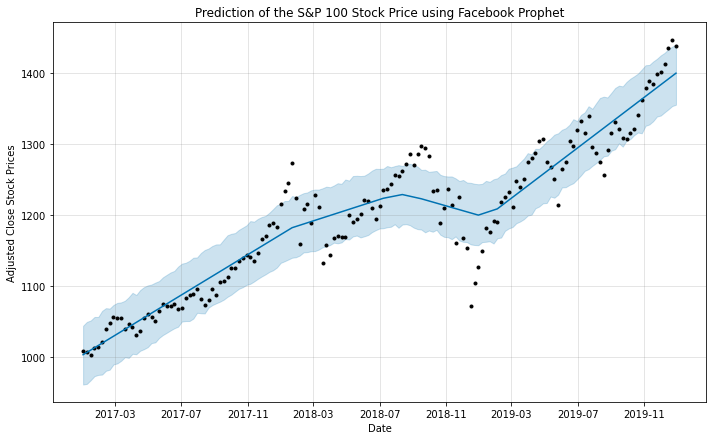

In [ ]:
future = m.make_future_dataframe(periods=0) 
prediction = m.predict(future)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
m.plot(prediction)
plt.title("Prediction of the S&P 100 Stock Price using Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Stock Prices")
plt.show()

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,1005.344540,961.171012,1044.084539,1005.344540,1005.344540,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1003.253697
1,2017-01-08,1008.597345,962.116155,1049.507578,1008.597345,1008.597345,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1006.506501
2,2017-01-15,1011.850149,967.291742,1051.505359,1011.850149,1011.850149,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1009.759306
3,2017-01-22,1015.102954,972.993250,1056.477426,1015.102954,1015.102954,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1013.012111
4,2017-01-29,1018.355759,974.781175,1056.437273,1018.355759,1018.355759,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1016.264916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019-12-01,1385.977039,1340.474668,1425.277879,1385.977039,1385.977039,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1383.886196
153,2019-12-08,1390.046421,1344.935942,1428.799833,1390.046421,1390.046421,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1387.955578
154,2019-12-15,1394.115802,1349.194955,1433.900889,1394.115802,1394.115802,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1392.024959
155,2019-12-22,1398.185184,1353.821943,1437.524490,1398.185184,1398.185184,-2.090843,-2.090843,-2.090843,-1.194767,-1.194767,-1.194767,-0.896076,-0.896076,-0.896076,0.0,0.0,0.0,1396.094341


Creating a visualisation  

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
fig=plot_plotly(m, prediction)
fig.update_layout(
    title="S&P 100 stock prices with y-hat data",
    xaxis_title="date",
    yaxis_title="Predicted stock prices",
)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



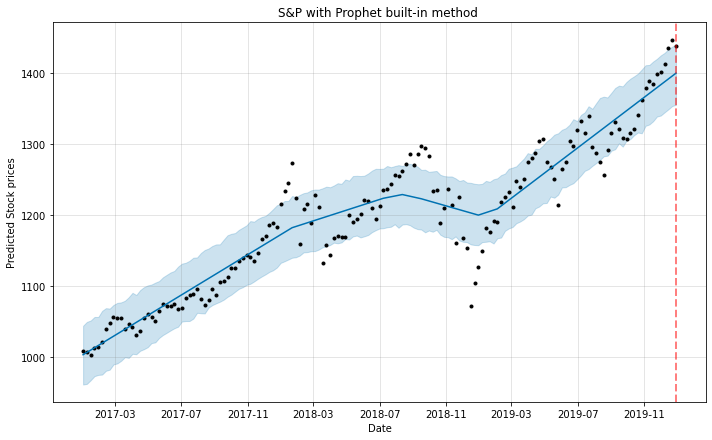

In [ ]:
# Plotting Prophet built-in method
fig = m.plot(prediction)
ax = fig.add_subplot(111)
ax.axvline(x=prediction['ds'].max() - pd.Timedelta('0 days'), c='red', lw=2, alpha=0.5, ls='--')
ax.set(title = "S&P with Prophet built-in method ",
       xlabel = "Date", 
       ylabel = "Predicted Stock prices")
fig.show()

Adding in the chargepoints

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



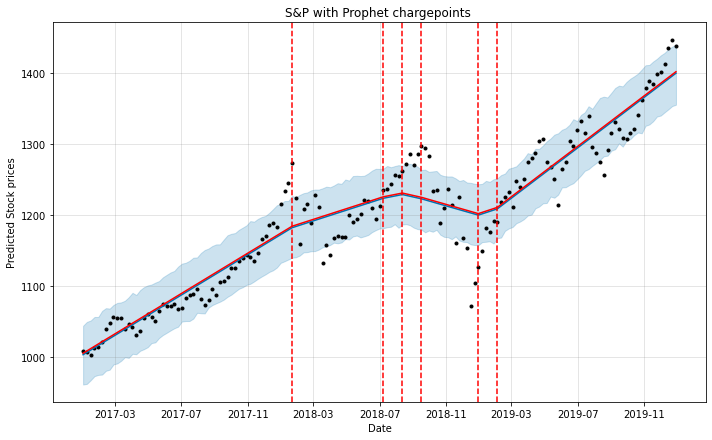

In [ ]:
fig = m.plot(prediction)
ax = fig.add_subplot(111)
ax.set(title = "S&P with Prophet chargepoints ",
       xlabel = "Date", 
       ylabel = "Predicted Stock prices")
a = add_changepoints_to_plot(fig.gca(), m, prediction)

Showing the components

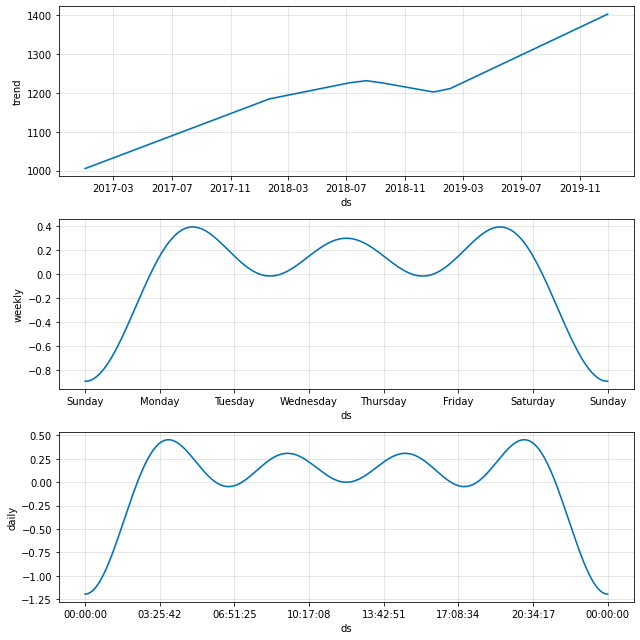

In [ ]:
m.plot_components(prediction, uncertainty=True)
plt.show()

Validation the results with cross validation

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-07-01 00:00:00 and 2018-07-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

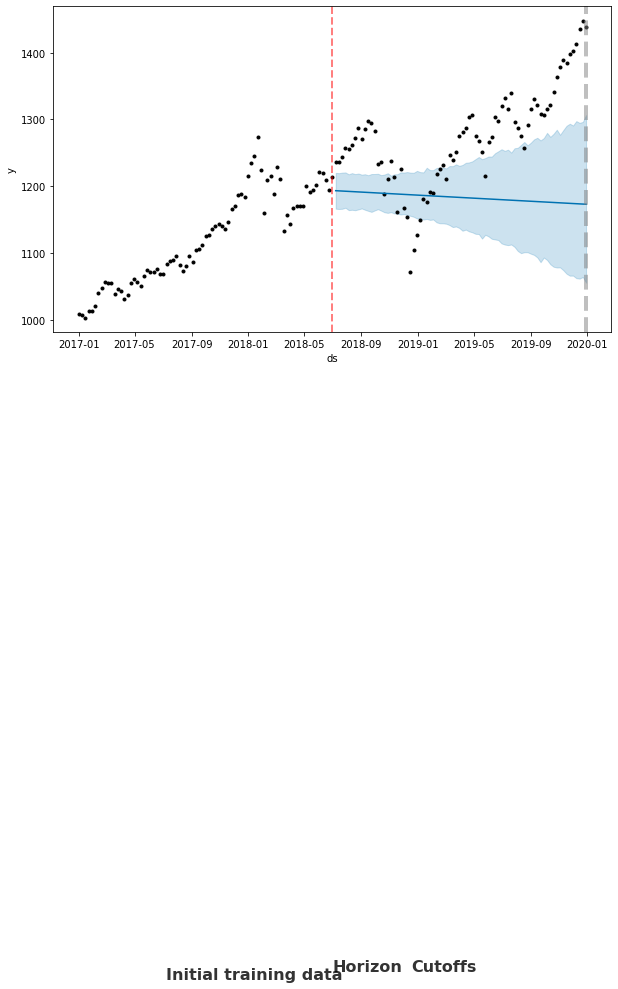

In [ ]:
# Fit the model with two years of data and define a horizon of 365 days forcasting per month
df_cv = cross_validation(m, initial='546 days', period = '7 days', horizon = '546 days')
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
#ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

# Making all the vlines for cutoffs
for item in cutoffs:
  ax.axvline(x=pd.to_datetime(item), c='red', lw=2, alpha=0.5, ls='--')

# Adding text to describe the data set splits
ax.text(x=pd.to_datetime('2017-07-07'),y=12, s='Initial training data', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2018-12-17'),y=24, s='Cutoffs', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.text(x=pd.to_datetime(cutoff) + pd.Timedelta('0 days'),y=24, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)

ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('545 days'), c='gray', lw=4,
           alpha=0.5, ls='--')

Performance metrics 

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(5)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,49 days,3709.456246,60.905306,59.448562,0.047383,0.050385,0.0
1,56 days,4751.971251,68.934543,66.996486,0.053053,0.051474,0.0
2,63 days,5400.640303,73.489049,72.251563,0.057049,0.055747,0.0
3,70 days,6309.050602,79.429532,78.482349,0.061705,0.063017,0.0
4,77 days,7361.950604,85.801810,84.595999,0.066183,0.063456,0.0


In [ ]:
df_p.mean()

horizon     297 days 12:00:00
mse                   12549.1
rmse                  98.9258
mae                   94.9504
mape                0.0730036
mdape               0.0717272
coverage             0.194444
dtype: object

In [ ]:
def getPerfomanceMetrics(m):
  return performance_metrics(getCrossValidationData(m))

def getCrossValidationData(m):
 return cross_validation(m, initial='546 days', period = '7 days', horizon = '546 days')

**Improving the forcast**

Adding holidays

In [ ]:
m = Prophet()
m.add_country_holidays(country_name='NO')
m.fit(fbdata)
m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0         Første nyttårsdag
1                    Søndag
2           Første påskedag
3           Første pinsedag
4           Arbeidernes dag
5              Grunnlovsdag
6            Første juledag
7             Andre juledag
8              Skjærtorsdag
9                Langfredag
10           Andre påskedag
11    Kristi himmelfartsdag
12           Andre pinsedag
dtype: object

In [ ]:
ascensionday = pd.DataFrame({
  'holiday': 'AscensionDay',
  'ds': pd.to_datetime(['2019-05-30']),
  'lower_window': 0,
  'upper_window': 1,
})

christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2017-12-24','2018-12-24','2019-12-24','2020-12-24']),
  'lower_window': -1,
  'upper_window': 7,
})

holidays = pd.concat((ascensionday, christmas))

m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='USA')
m.fit(fbdata)
future = m.make_future_dataframe(periods=0, freq='D')
forecast = m.predict(future)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fbdata['ds'], y=fbdata['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted',))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['holidays'], name='Holidays',))
fig.update_layout(
    title="S&P 100 stock prices with holidays", title_x=0.5,
    xaxis_title="date",
    yaxis_title="Predicted stock prices with holidays",
)
fig.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
getPerfomanceMetrics(m).mean()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-07-01 00:00:00 and 2018-07-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

horizon     297 days 12:00:00
mse                   16482.5
rmse                  116.394
mae                   112.751
mape                0.0909183
mdape               0.0900732
coverage             0.357143
dtype: object

tuning the hyperparameter

In [ ]:
def create_param_combinations(**param_dict):
    param_iter = itertools.product(*param_dict.values())
    params =[]
    for param in param_iter:
        params.append(param) 
    params_df = pd.DataFrame(params, columns=list(param_dict.keys()))
    return params_df

def single_cv_run(history_df, metrics, param_dict, parallel):
    m = Prophet(holidays=holidays, **param_dict)
    m.add_country_holidays(country_name='USA')
    m.fit(history_df)
    df_cv = getCrossValidationData(m)
    df_p = performance_metrics(df_cv, rolling_window=1)
    df_p['params'] = str(param_dict)
    df_p = df_p.loc[:, metrics]
    return df_p


#'changepoint_range': [0.6, 0.7, 0.75, 0.8, 0.9],
#'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.25, 0.5],
#'seasonality_prior_scale':[0.5, 1.0, 2.5, 5],
#'holidays_prior_scale':[1.0, 5.0, 10.0, 15.0],
#'yearly_seasonality':[5, 10, 15, 20],
#'weekly_seasonality':[5, 10, 15, 20],
pd.set_option('display.max_colwidth', None)
param_grid = {                  
                'changepoint_prior_scale': [0.01],
                'changepoint_range': [0.3],
                'holidays_prior_scale':[1.0],
                'seasonality_prior_scale':[0.5],
                'yearly_seasonality':[20],
                'weekly_seasonality':[5],
              }
metrics = ['horizon', 'mse','rmse', 'mae', 'mape', 'mdape','params'] 
results = []

#Creating the results of Prophet
params_df = create_param_combinations(**param_grid)
for param in params_df.values:
    param_dict = dict(zip(params_df.keys(), param))
    cv_df = single_cv_run(fbdata,  metrics, param_dict, parallel="processes")
    results.append(cv_df)
results_df = pd.concat(results).reset_index(drop=True)
best_param = results_df.loc[results_df['rmse'] == min(results_df['rmse']), ['params']]
print(f'\n The best param combination is {best_param.values[0][0]}')
results_df.mean()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-07-01 00:00:00 and 2018-07-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.



 The best param combination is {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.3, 'holidays_prior_scale': 1.0, 'seasonality_prior_scale': 0.5, 'yearly_seasonality': 20.0, 'weekly_seasonality': 5.0}


horizon    546 days 00:00:00
mse                  8178.93
rmse                 90.4374
mae                  72.1491
mape               0.0588522
mdape               0.044939
dtype: object

Trail and error with parameters

In [ ]:
m = Prophet(holidays=holidays, changepoint_prior_scale=0.5,
            changepoint_range=0.9,
            seasonality_prior_scale=0.5,
            holidays_prior_scale=15.0,
            yearly_seasonality=20,
            weekly_seasonality=20,
            seasonality_mode='additive')

m.add_country_holidays(country_name='NO')
    
m.fit(fbdata)
getPerfomanceMetrics(m).mean()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-07-01 00:00:00 and 2018-07-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

horizon     297 days 12:00:00
mse                   7795.78
rmse                   75.761
mae                   70.5919
mape                 0.057281
mdape               0.0567464
coverage             0.930556
dtype: object

Creating final forcast

In [ ]:
future = m.make_future_dataframe(periods=0, freq='D')
future = future.merge(fbdata, on='ds')
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Andre juledag,Andre juledag_lower,Andre juledag_upper,Andre pinsedag,Andre pinsedag_lower,Andre pinsedag_upper,Andre påskedag,Andre påskedag_lower,Andre påskedag_upper,Arbeidernes dag,Arbeidernes dag_lower,Arbeidernes dag_upper,AscensionDay,AscensionDay_lower,AscensionDay_upper,Christmas,Christmas_lower,Christmas_upper,Første juledag,Første juledag_lower,Første juledag_upper,Første nyttårsdag,Første nyttårsdag_lower,Første nyttårsdag_upper,Første pinsedag,Første pinsedag_lower,Første pinsedag_upper,Første påskedag,Første påskedag_lower,Første påskedag_upper,Grunnlovsdag,Grunnlovsdag_lower,Grunnlovsdag_upper,Kristi himmelfartsdag,Kristi himmelfartsdag_lower,Kristi himmelfartsdag_upper,Langfredag,Langfredag_lower,Langfredag_upper,Skjærtorsdag,Skjærtorsdag_lower,Skjærtorsdag_upper,Søndag,Søndag_lower,Søndag_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,970.209858,990.525484,1027.006651,970.209858,970.209858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,39.422414,39.422414,39.422414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,37.953291,37.953291,37.953291,36.957709,36.957709,36.957709,-4.976481,-4.976481,-4.976481,5.972063,5.972063,5.972063,0.0,0.0,0.0,1008.163149
1,2017-01-08,975.824064,980.059439,1015.325652,975.824064,975.824064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,20.699275,20.699275,20.699275,-2.464705,-2.464705,-2.464705,-4.976481,-4.976481,-4.976481,28.140461,28.140461,28.140461,0.0,0.0,0.0,996.523339
2,2017-01-15,981.438270,1001.007196,1035.670768,981.438270,981.438270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,36.319423,36.319423,36.319423,-2.464705,-2.464705,-2.464705,-4.976481,-4.976481,-4.976481,43.760609,43.760609,43.760609,0.0,0.0,0.0,1017.757692
3,2017-01-22,987.052475,1012.356254,1048.240275,987.052475,987.052475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,43.090703,43.090703,43.090703,-2.464705,-2.464705,-2.464705,-4.976481,-4.976481,-4.976481,50.531889,50.531889,50.531889,0.0,0.0,0.0,1030.143178
4,2017-01-29,992.666681,993.440674,1028.853971,992.666681,992.666681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,19.535374,19.535374,19.535374,-2.464705,-2.464705,-2.464705,-4.976481,-4.976481,-4.976481,26.976560,26.976560,26.976560,0.0,0.0,0.0,1012.202055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019-12-01,1459.156534,1401.545296,1440.224865,1459.156534,1459.156534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.464705,-2.464705,-2.464705,-38.881318,-38.881318,-38.881318,-2.464705,-2.464705,-2.464705,-4.976481,-4.976481,-4.976481,-31.44

In [ ]:
fig=plot_plotly(m, forecast)
fig.update_layout(
    title="S&P 100 stock prices with y-hat data",
    xaxis_title="date",
    yaxis_title="Predicted stock prices",
)
fig.show()

In [ ]:
# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Adj Close'], name='Training'))
fig.add_trace(go.Scatter(x=data['Date'][78:], y=data['Adj Close'][78:], name='Actual'))
fig.add_trace(go.Scatter(x=forecast['ds'][78:], y=forecast['yhat'][78:], name='Forcasted'))
fig.update_layout(
    title="Facebook Prophet S&P 100 stock price prediction", title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Adjusted Close Stock Price",
)
fig.show()